# IMDB Movie Reviews Prediction 

### Imporing the dataset

In [1]:
from keras.datasets import imdb

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# Here 10,000 represents the most frequent words

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

### Preparing the data to be feed into the newtork (vectorizing the data)

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)


In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
#vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the model

In [8]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### Holding out some of the data from training for the validation purpose

In [10]:
x_val = x_train[:10000]
remain_x_train = x_train[10000:]

y_val = y_train[:10000]
remain_y_train = y_train[10000:]

In [11]:
history = model.fit(remain_x_train,
                    remain_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3085 - val_binary_accuracy: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1150 - binary_accuracy: 0.9650 - val_loss: 0.3166 - val_bi

### Plotting the loss values and accuracies to get a sense of how good a model is performing on new data

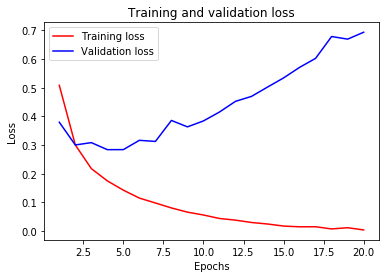

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

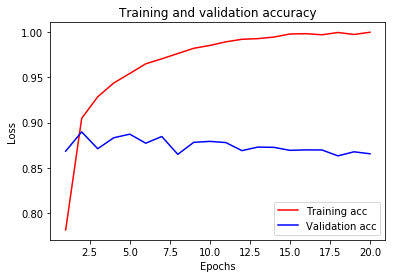

In [13]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### From the above figures, it is clearly seen that the model has high variance (Overfitting)

#### Let's solve this issue using regualization (specifically dropout)

In [14]:
updated_model = models.Sequential()
updated_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
updated_model.add(layers.Dropout(0.5))
updated_model.add(layers.Dense(16, activation='relu'))
updated_model.add(layers.Dropout(0.5))
updated_model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
updated_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [16]:
updated_model_history = updated_model.fit(x_train, y_train, epochs=20, batch_size=512)

Epoch 1/20
25000/25000 [==============================] - 2s 75us/step - loss: 0.5843 - acc: 0.6916
Epoch 2/20
25000/25000 [==============================] - 2s 69us/step - loss: 0.4424 - acc: 0.8144
Epoch 3/20
25000/25000 [==============================] - 2s 70us/step - loss: 0.3648 - acc: 0.8560
Epoch 4/20
25000/25000 [==============================] - 2s 70us/step - loss: 0.3072 - acc: 0.8854
Epoch 5/20
25000/25000 [==============================] - 2s 69us/step - loss: 0.2708 - acc: 0.9003
Epoch 6/20
25000/25000 [==============================] - 2s 70us/step - loss: 0.2411 - acc: 0.9123
Epoch 7/20
25000/25000 [==============================] - 2s 70us/step - loss: 0.2167 - acc: 0.9200
Epoch 8/20
25000/25000 [==============================] - 2s 69us/step - loss: 0.2051 - acc: 0.9235
Epoch 9/20
25000/25000 [==============================] - 2s 69us/step - loss: 0.1906 - acc: 0.9292
Epoch 10/20
25000/25000 [==============================] - 2s 69us/step - loss: 0.1798 - acc: 0.9324

### Let's evaluate the results of this updated model on the new data

In [17]:
results = updated_model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 72us/step


In [18]:
results

[0.5341625801515579, 0.87248]

### Predicting the new movie reviews (whether postive or negative)

In [19]:
updated_model.predict(x_test)
# Shows probability of being a positive or negative

array([[0.04294973],
       [1.        ],
       [0.9999995 ],
       ...,
       [0.00510533],
       [0.03483593],
       [0.9916928 ]], dtype=float32)